# Matplotlib의 pyplot과 pyplot.subplots
[Matplotlib](https://matplotlib.org/)는 [matlab 수치해석 프로그램](https://www.mathworks.com/products/matlab.html)을 python 기반 작업공간에서 다양한 작업을 하기 위해 개발된 외부 라이브러리다.
이 라이브러리에서 그래프를 그리는 방식은 크게 2종류가 있는데, 간편하게 사용할 수 있는 pyplot가 첫번째다. 두번째 방식은 객체지향형 모듈에 좀 복잡한 객체 생성을 거쳐야하지만 다양한 설정 및 한 그래프 공간에 여러 축을 표현할 수 있는 pyplot.subplots가 있다.

[Matplotlib 튜토리얼](https://matplotlib.org/stable/gallery/index.html)

## pyplot  API

### pyplot 예제

In [1]:
import pandas as pd       ## pandas 라이브러리

f1 = "E:\\Fear\\Univ\\4-2\\대기정보전산학\\실습\\co2.csv"
f2 = "E:\\Fear\\Univ\\4-2\\대기정보전산학\\실습\\1880-2019.csv"

data1 = pd.read_csv(f1, engine='python')

styr = 1900
edyr = 2014+1 # [이상:미만] 이므로 2014 -> 2015

year = data1['year']    ### ['year'] -> year 열만 읽어낸다.
conc = data1['data_mean_global']

time = year[styr:edyr]
co2 = conc[styr:edyr]

print(co2)
## [n번째 줄]     [co2값]

print(co2.head(3))    ## 위에서 n개
print(co2.tail(3))    ## 아래서 n개

1900    295.674998
1901    296.006998
1902    296.324997
1903    296.653997
1904    296.953996
           ...    
2010    388.717029
2011    390.944015
2012    393.015993
2013    395.724979
2014    397.546977
Name: data_mean_global, Length: 115, dtype: float64
1900    295.674998
1901    296.006998
1902    296.324997
Name: data_mean_global, dtype: float64
2012    393.015993
2013    395.724979
2014    397.546977
Name: data_mean_global, dtype: float64


In [2]:
import numpy as np        ## numpy 라이브러리

data2 = np.genfromtxt(f2,  encoding='utf8',dtype=None,delimiter=',',names=('year','value'), skip_header=5)
## 변수 / 인코딩 / 혼합 데이터 : dtype=None / 값 사이 구분 / 열 이름 지정 / 머릿말 생략 열 수

size=len(data2)

print(size)

for i in range(0,size):
    t = data2['year'][i]    ## year 열의 i번째 값을 t에 저장
    if t == 1900:
        styr = i
    elif t == 2015:
        edyr = i
    i=i+1
    
print(styr)
print(edyr)

temp = data2['value'][styr:edyr]

print(temp)

140
20
135
[-0.07 -0.15 -0.25 -0.37 -0.46 -0.28 -0.21 -0.38 -0.43 -0.44 -0.4  -0.44
 -0.34 -0.32 -0.14 -0.09 -0.32 -0.39 -0.3  -0.25 -0.23 -0.16 -0.24 -0.25
 -0.24 -0.18 -0.07 -0.17 -0.18 -0.32 -0.11 -0.06 -0.13 -0.26 -0.11 -0.16
 -0.12 -0.01 -0.02  0.01  0.16  0.27  0.11  0.1   0.28  0.18 -0.01 -0.04
 -0.05 -0.07 -0.15  0.    0.04  0.13 -0.1  -0.13 -0.18  0.07  0.12  0.08
  0.05  0.09  0.1   0.12 -0.14 -0.07 -0.01  0.   -0.03  0.1   0.06 -0.07
  0.03  0.19 -0.06  0.01 -0.07  0.21  0.12  0.23  0.28  0.32  0.19  0.36
  0.17  0.16  0.24  0.38  0.39  0.29  0.45  0.39  0.24  0.28  0.34  0.47
  0.32  0.51  0.65  0.44  0.43  0.57  0.62  0.64  0.58  0.67  0.64  0.62
  0.54  0.65  0.73  0.58  0.64  0.67  0.74]


설정값이 적은 pyplot에선 아래와 같이 기본형태가 정해진 matplotlib를 로드해서 사용한다.

In [3]:
%matplotlib notebook  
## matplotlib 그림툴 로드

<IPython.core.display.Javascript object>


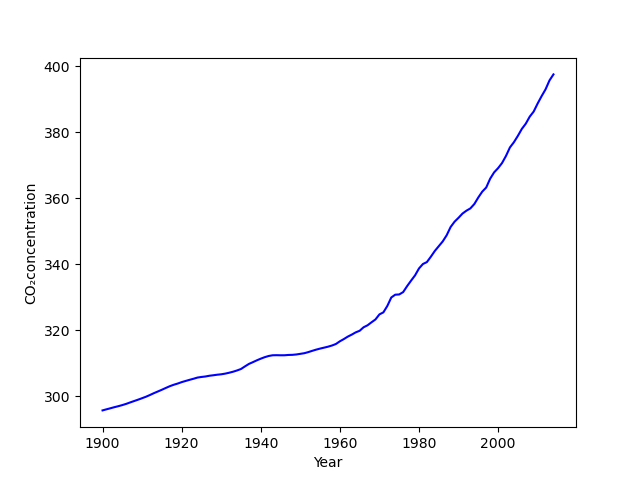

In [6]:
import matplotlib.pyplot as plt

plt.plot(time,co2,'b')   ## 'matplotlib named color' 참고
plt.xlabel('Year')
plt.ylabel('CO₂concentration')  ## 한글 유니코드, 특수문자 모두 사용가능
plt.show()

In [7]:
plt.close()

<IPython.core.display.Javascript object>


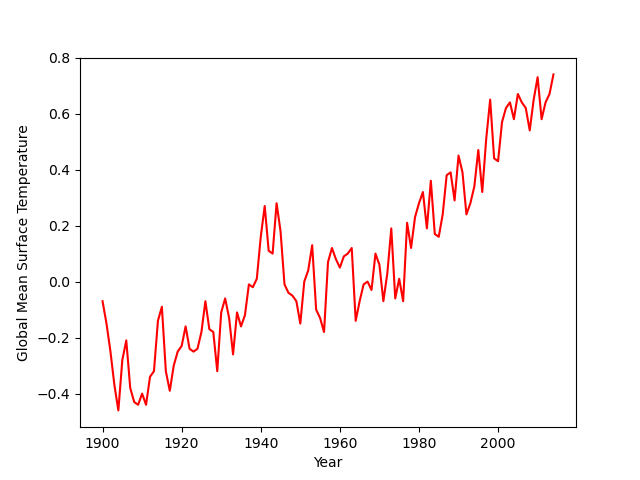

In [8]:
plt.plot(time,temp,'r')
plt.xlabel('Year')
plt.ylabel('Global Mean Surface Temperature')
plt.show()

In [9]:
plt.close()

## pylot.subplots (객체지향 API)

### pylot.subplots 예제1

<IPython.core.display.Javascript object>


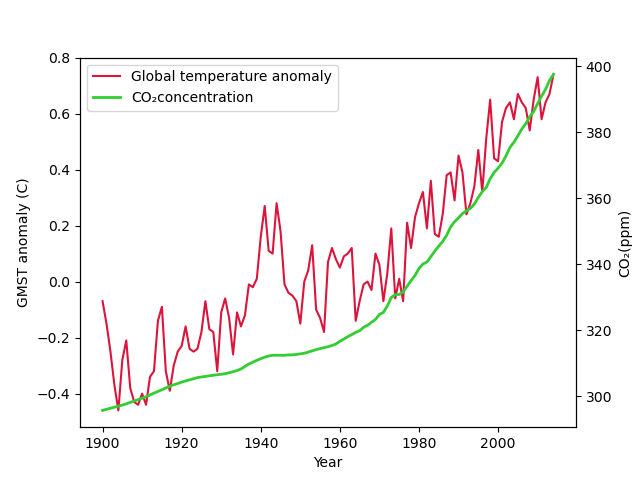

<function matplotlib.pyplot.show(block=None)>

In [10]:
fig, ax1 = plt.subplots()   ## matplotlib.pyplot.subplots 참고
ax2 = ax1.twinx()            ## 축을 하나 더 추가하기 위한 함수 twinx

ax1.set_ylabel('GMST anomaly (C)')            ##
ax1.set_xlabel('Year')                        ##   라벨 지정
ax2.set_ylabel('CO₂(ppm)')                   ##

line1 = ax1.plot(time, temp, color='crimson', label='Global temperature anomaly',linewidth = 1.5)
line2 = ax2.plot(time, co2, color='limegreen', label='CO₂concentration',linewidth = 2.)

lines = line1 + line2                         ## 두 장의 line 그림을 합친 변수
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper left')    ## loc 'location'     ## matplotlin.axes.Axes.legend 참고


plt.show

In [11]:
plt.close()

<IPython.core.display.Javascript object>


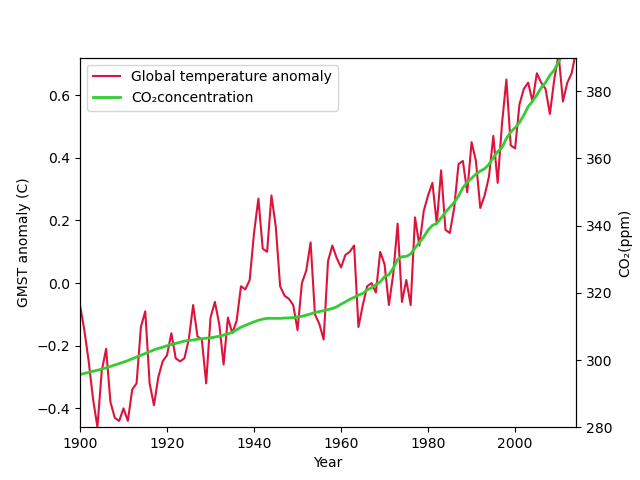

<function matplotlib.pyplot.show(block=None)>

In [12]:
fig, ax1 = plt.subplots() 
ax2 = ax1.twinx() 

ax1.set_ylabel('GMST anomaly (C)')   
ax1.set_xlabel('Year')     
ax2.set_ylabel('CO₂(ppm)')  
ax1.set_ylim([-0.46,0.72])    ## 범위 조정
ax2.set_ylim([280,390])       ##
ax1.set_xlim([1900,2014])

line1 = ax1.plot(time, temp, color='crimson', label='Global temperature anomaly',linewidth = 1.5)
line2 = ax2.plot(time, co2, color='limegreen', label='CO₂concentration',linewidth = 2.)

lines = line1 + line2      
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper left') 


plt.show

In [13]:
plt.close()